In [3]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/300.2 kB 330.3 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/300.2 kB 326.8 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 435.7 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 952.6 kB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [192]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxpe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [2]:
df = pd.read_csv('C:\\Users\\maxpe\\Documents\\data_analyst\\Projet\\russia_vs_ukraine_tweet\\filename.csv')

### Obtention des informations basiques pour découvrir les données

In [3]:
print(df.head())

                    id      conversation_id               created_at  \
0  1630366235354451969  1630152070530576385  2023-02-28 00:36:15 UTC   
1  1630366226424778753  1630366226424778753  2023-02-28 00:36:13 UTC   
2  1630366225930027011  1630366225930027011  2023-02-28 00:36:13 UTC   
3  1630366223056662530  1630351686974992385  2023-02-28 00:36:12 UTC   
4  1630366221483884545  1629903982255644672  2023-02-28 00:36:12 UTC   

         date      time  timezone              user_id     username  \
0  2023-02-28  00:36:15         0  1493761817406894086  tomasliptai   
1  2023-02-28  00:36:13         0  1526694166662721536  paperfloure   
2  2023-02-28  00:36:13         0  1053018392939167746    katetbar1   
3  2023-02-28  00:36:12         0            602371247    jlhrdhmom   
4  2023-02-28  00:36:12         0  1053594763214184448    phemikali   

                  name place  ... geo source user_rt_id user_rt retweet_id  \
0         Tomas Liptai   NaN  ... NaN    NaN        NaN     Na

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10014 non-null  int64  
 1   conversation_id  10014 non-null  int64  
 2   created_at       10014 non-null  object 
 3   date             10014 non-null  object 
 4   time             10014 non-null  object 
 5   timezone         10014 non-null  int64  
 6   user_id          10014 non-null  int64  
 7   username         10014 non-null  object 
 8   name             10014 non-null  object 
 9   place            3 non-null      object 
 10  tweet            10014 non-null  object 
 11  language         10014 non-null  object 
 12  mentions         10014 non-null  object 
 13  urls             10014 non-null  object 
 14  photos           10014 non-null  object 
 15  replies_count    10014 non-null  int64  
 16  retweets_count   10014 non-null  int64  
 17  likes_count 

In [5]:
df.describe(include='all')

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
count,1.001400e+04,1.001400e+04,10014,10014,10014,10014.0,1.001400e+04,10014,10014,3,...,0.0,0.0,0.0,0.0,0.0,10014,0.0,0.0,0.0,0.0
unique,NaN,NaN,5797,2,5797,NaN,NaN,7569,7440,3,...,NaN,NaN,NaN,NaN,NaN,4257,NaN,NaN,NaN,NaN
top,NaN,NaN,2023-02-28 00:00:01 UTC,2023-02-27,00:00:01,NaN,NaN,wrlmyxe7zer5ckr,キッチン大好き。,"{'type': 'Point', 'coordinates': [43.7742911, ...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
freq,NaN,NaN,8,7762,8,NaN,NaN,24,24,1,...,NaN,NaN,NaN,NaN,NaN,3178,NaN,NaN,NaN,NaN
mean,1.630348e+18,1.629356e+18,NaN,NaN,NaN,0.0,8.634429e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.007272e+13,1.450302e+16,NaN,NaN,NaN,0.0,6.762363e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.630331e+18,9.012334e+17,NaN,NaN,NaN,0.0,5.852300e+04,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.630339e+18,1.630187e+18,NaN,NaN,NaN,0.0,1.463392e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.630347e+18,1.630306e+18,NaN,NaN,NaN,0.0,1.146196e+18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.630356e+18,1.630342e+18,NaN,NaN,NaN,0.0,1.498023e+18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(10014, 36)

### Vérification des doublons

In [7]:
df.duplicated().value_counts()

False    10014
Name: count, dtype: int64

Aucun doublon

### Vérification des données manquantes

In [8]:
df.isna().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              10011
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url           9235
video                  0
thumbnail           8927
near               10014
geo                10014
source             10014
user_rt_id         10014
user_rt            10014
retweet_id         10014
reply_to               0
retweet_date       10014
translate          10014
trans_src          10014
trans_dest         10014
dtype: int64

In [9]:
df['trans_dest'].isna().sum()

10014

In [10]:
df = df.drop(columns = ['trans_dest','trans_src','translate','retweet_date','retweet_id','user_rt','user_rt_id','source','geo','near'])

### Vérification des nouvelles informations sur les données 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               10014 non-null  int64 
 1   conversation_id  10014 non-null  int64 
 2   created_at       10014 non-null  object
 3   date             10014 non-null  object
 4   time             10014 non-null  object
 5   timezone         10014 non-null  int64 
 6   user_id          10014 non-null  int64 
 7   username         10014 non-null  object
 8   name             10014 non-null  object
 9   place            3 non-null      object
 10  tweet            10014 non-null  object
 11  language         10014 non-null  object
 12  mentions         10014 non-null  object
 13  urls             10014 non-null  object
 14  photos           10014 non-null  object
 15  replies_count    10014 non-null  int64 
 16  retweets_count   10014 non-null  int64 
 17  likes_count      10014 non-null

In [12]:
df_place = df['place'].dropna()
print(df_place)

2963    {'type': 'Point', 'coordinates': [43.7742911, ...
5483    {'type': 'Point', 'coordinates': [-33.86896496...
9866    {'type': 'Point', 'coordinates': [53.3490837, ...
Name: place, dtype: object


In [13]:
df_quote_url = df['quote_url'].dropna()
print(df_quote_url)

15       https://twitter.com/harryjsisson/status/163034...
64       https://twitter.com/ianfluencer/status/1630309...
65       https://twitter.com/Daniel23501037/status/1630...
67       https://twitter.com/keemstar/status/1630330524...
111      https://twitter.com/talkrealopinion/status/163...
                               ...                        
9926     https://twitter.com/krus_stern/status/16301200...
9962     https://twitter.com/guyverhofstadt/status/1630...
9964     https://twitter.com/mfa_russia/status/16301673...
9971     https://twitter.com/NiranjanShan13/status/1630...
10002    https://twitter.com/krus_stern/status/16303002...
Name: quote_url, Length: 779, dtype: object


In [14]:
df_quote_url.describe()

count                                                   779
unique                                                  699
top       https://twitter.com/Gerashchenko_en/status/163...
freq                                                      6
Name: quote_url, dtype: object

In [15]:
df_thumbnail = df['thumbnail'].dropna()
print(df_thumbnail)

20         https://pbs.twimg.com/media/FqA4_g6WIAA0mSl.jpg
21       https://pbs.twimg.com/ext_tw_video_thumb/16303...
37         https://pbs.twimg.com/media/FqA5TnaXgAIRCU6.jpg
43         https://pbs.twimg.com/media/FqA5SbyWIAA08HM.jpg
45         https://pbs.twimg.com/media/FqA5ShZaAAA5GRS.jpg
                               ...                        
9989     https://pbs.twimg.com/ext_tw_video_thumb/16303...
9992     https://pbs.twimg.com/ext_tw_video_thumb/16303...
9993       https://pbs.twimg.com/media/FqAZipiWAAI4Awi.jpg
9999       https://pbs.twimg.com/media/FqAZZodaEAEqxZD.jpg
10009      https://pbs.twimg.com/media/FqAZgEdWwAAKfCZ.jpg
Name: thumbnail, Length: 1087, dtype: object


In [16]:
df1 = df.drop(columns =['place','quote_url','thumbnail'])
print(df1.head())

                    id      conversation_id               created_at  \
0  1630366235354451969  1630152070530576385  2023-02-28 00:36:15 UTC   
1  1630366226424778753  1630366226424778753  2023-02-28 00:36:13 UTC   
2  1630366225930027011  1630366225930027011  2023-02-28 00:36:13 UTC   
3  1630366223056662530  1630351686974992385  2023-02-28 00:36:12 UTC   
4  1630366221483884545  1629903982255644672  2023-02-28 00:36:12 UTC   

         date      time  timezone              user_id     username  \
0  2023-02-28  00:36:15         0  1493761817406894086  tomasliptai   
1  2023-02-28  00:36:13         0  1526694166662721536  paperfloure   
2  2023-02-28  00:36:13         0  1053018392939167746    katetbar1   
3  2023-02-28  00:36:12         0            602371247    jlhrdhmom   
4  2023-02-28  00:36:12         0  1053594763214184448    phemikali   

                  name                                              tweet  \
0         Tomas Liptai  @nazijaeger__ @derwener @Anonymous9775 

In [17]:
df_video = df['video'].dropna()
print(df_video)

0        0
1        0
2        0
3        0
4        0
        ..
10009    1
10010    0
10011    0
10012    0
10013    0
Name: video, Length: 10014, dtype: int64


In [18]:
df_video.value_counts()

video
0    8927
1    1087
Name: count, dtype: int64

In [19]:
df_photos = df['photos'].dropna()
print(df_photos)

0                                                       []
1                                                       []
2                                                       []
3                                                       []
4                                                       []
                               ...                        
10009    ['https://pbs.twimg.com/media/FqAZgEdWwAAKfCZ....
10010                                                   []
10011                                                   []
10012                                                   []
10013                                                   []
Name: photos, Length: 10014, dtype: object


In [20]:
df_photos.value_counts()

photos
[]                                                                                                                                                                                                              9094
['https://pbs.twimg.com/media/FqAnSzNaUAE8pM7.png']                                                                                                                                                                2
['https://pbs.twimg.com/tweet_video_thumb/FqAiR_dWYAA1Mzo.jpg']                                                                                                                                                    1
['https://pbs.twimg.com/media/FqAi4OHagAE6NB0.jpg']                                                                                                                                                                1
['https://pbs.twimg.com/media/FqAi4FrWwAEZYce.jpg']                                                                                          

In [21]:
df1.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,reply_to
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,@nazijaeger__ @derwener @Anonymous9775 Russia ...,...,[],0,0,0,[],[],https://twitter.com/TomasLiptai/status/1630366...,False,0,"[{'screen_name': 'nazijaeger__', 'name': 'nazi..."
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,The Russia HAARP which could destroy USA in on...,...,[],0,0,0,[],[],https://twitter.com/paperfloure/status/1630366...,False,0,[]
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,Putin gives Steven Seagal Russia&amp;#8217;s O...,...,[],0,0,0,[],[],https://twitter.com/katetbar1/status/163036622...,False,0,[]
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,...,[],0,0,0,[],[],https://twitter.com/JlhRDHMOM/status/163036622...,False,0,"[{'screen_name': 'MainelifeR', 'name': 'Mainel..."
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,@Pottingpinks @mfa_russia @mod_russia @mil_his...,...,[],0,0,0,[],[],https://twitter.com/PhemiKali/status/163036622...,False,0,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'..."


In [22]:
df1.dtypes

id                  int64
conversation_id     int64
created_at         object
date               object
time               object
timezone            int64
user_id             int64
username           object
name               object
tweet              object
language           object
mentions           object
urls               object
photos             object
replies_count       int64
retweets_count      int64
likes_count         int64
hashtags           object
cashtags           object
link               object
retweet              bool
video               int64
reply_to           object
dtype: object

In [23]:
df_urls = df['urls'].dropna()
print(df_urls)

0                                                       []
1        ['https://reality-choice.org/177/sura-the-russ...
2        ['https://thehill.com/blogs/in-the-know/387609...
3                                                       []
4                                                       []
                               ...                        
10009                                                   []
10010                                                   []
10011                                                   []
10012                                                   []
10013                                                   []
Name: urls, Length: 10014, dtype: object


In [24]:
df1['hashtags'].head(50)

0                                                    []
1                                                    []
2                                                    []
3                                                    []
4                                                    []
5                                                    []
6     ['massage_in_riyadh', 'مبادل_الرياض', 'موجب_ال...
7                                                    []
8                                                    []
9     ['wef', 'globalists', 'nato', 'ukraine', 'ukro...
10                                                   []
11                                                   []
12                                                   []
13                                                   []
14                                     ['warinukraine']
15                                                   []
16                                                   []
17                                              

In [25]:
df1['hashtags'].describe(include='all')

count     10014
unique      746
top          []
freq       9041
Name: hashtags, dtype: object

In [26]:
df1['reply_to'].head(50)

0     [{'screen_name': 'nazijaeger__', 'name': 'nazi...
1                                                    []
2                                                    []
3     [{'screen_name': 'MainelifeR', 'name': 'Mainel...
4     [{'screen_name': 'Pottingpinks', 'name': 'GRS'...
5     [{'screen_name': 'CJKlein1', 'name': 'CJK', 'i...
6                                                    []
7     [{'screen_name': 'kathykrobot', 'name': 'Kathl...
8     [{'screen_name': 'Edwardbrink87', 'name': 'Ann...
9                                                    []
10    [{'screen_name': 'TaviDuprix', 'name': 'Richar...
11                                                   []
12                                                   []
13                                                   []
14                                                   []
15                                                   []
16                                                   []
17                                              

In [27]:
df1['likes_count'].head(50)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    1
38    0
39    1
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: likes_count, dtype: int64

In [28]:
df1['retweets_count'].describe(include='all')

count    10014.000000
mean         0.499201
std          7.684152
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        579.000000
Name: retweets_count, dtype: float64

In [29]:
df1['replies_count'].describe(include='all')

count    10014.000000
mean         0.405432
std          2.764969
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        225.000000
Name: replies_count, dtype: float64

In [30]:
df1['likes_count'].describe(include='all')

count    10014.000000
mean         2.399041
std         30.217589
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1524.000000
Name: likes_count, dtype: float64

Text(0.5, 1.0, 'Répartition des likes')

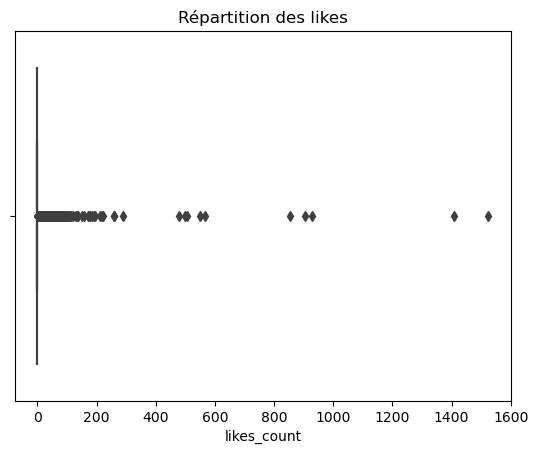

In [31]:
sns.boxplot(data=df1,x='likes_count')
plt.title('Répartition des likes')

In [32]:
df1[df1['likes_count'] >= 200]['id'].count()

16

In [33]:
print(df1['likes_count'].nlargest(10))
print()
print(df1['likes_count'].nlargest(10).sum())

9488    1524
7262    1407
8072     927
7325     904
7947     853
8260     566
5607     548
9542     507
4892     498
9008     477
Name: likes_count, dtype: int64

8211


Text(0.5, 1.0, 'Répartition des retweets')

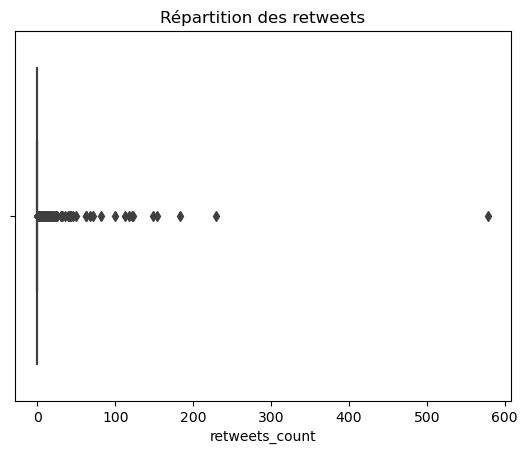

In [34]:
sns.boxplot(data=df1,x='retweets_count')
plt.title('Répartition des retweets')

In [35]:
df1[df1['retweets_count'] >= 10]['id'].count()

82

In [36]:
print(df1['retweets_count'].nlargest(10))
print()
print(df1['retweets_count'].nlargest(10).sum())

9488    579
8072    229
9311    183
7262    154
8260    149
5607    123
4892    122
7325    117
9008    113
9542     99
Name: retweets_count, dtype: int64

1868


Text(0.5, 1.0, 'Répartition des réponses')

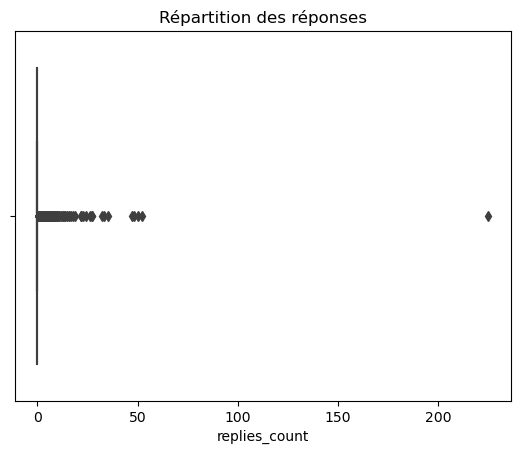

In [37]:
sns.boxplot(data=df1,x='replies_count')
plt.title('Répartition des réponses')

In [38]:
df[df1['replies_count'] >= 10]['id'].count()

36

In [39]:
print(df1['replies_count'].nlargest(10))
print()
print(df1['replies_count'].nlargest(10).sum())

7262    225
9488     52
8260     50
9542     48
9581     47
6414     35
3114     33
8072     32
5607     27
6313     27
Name: replies_count, dtype: int64

576


In [40]:
print('replies: ',df1['replies_count'].sum())
print('likes: ',df1['likes_count'].sum())
print('retweets: ',df1['retweets_count'].sum())

replies:  4060
likes:  24024
retweets:  4999


In [41]:
print('top 10 likes: ',(8211/24024))
print('top 10 retweets: ',(1868/4999))
print('top 10 replies: ',(576/4060))

top 10 likes:  0.34178321678321677
top 10 retweets:  0.3736747349469894
top 10 replies:  0.14187192118226602


In [42]:
df2 = df1[['date','username','tweet','language','replies_count','retweets_count','likes_count']]

In [43]:
df2.head()

,date,username,tweet,language,replies_count,retweets_count,likes_count
0,2023-02-28,tomasliptai,@nazijaeger__ @derwener @Anonymous9775 Russia ...,en,0,0,0
1,2023-02-28,paperfloure,The Russia HAARP which could destroy USA in on...,en,0,0,0
2,2023-02-28,katetbar1,Putin gives Steven Seagal Russia&amp;#8217;s O...,en,0,0,0
3,2023-02-28,jlhrdhmom,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,en,0,0,0
4,2023-02-28,phemikali,@Pottingpinks @mfa_russia @mod_russia @mil_his...,en,0,0,0


In [44]:
df2['language'].value_counts()

language
en     8858
pt      440
it      194
qme     105
und      60
in       47
ru       44
ja       42
es       36
ca       20
qht      20
th       19
fr       18
de       14
ko        9
vi        8
nl        8
ro        7
fi        7
ar        6
zxx       6
uk        6
cs        6
zh        5
pl        5
qam       4
tl        4
da        3
eu        2
no        2
hi        2
tr        2
hu        1
cy        1
lv        1
el        1
bn        1
Name: count, dtype: int64

In [45]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub("\[.*?\]",'', text)
    text = re.sub('https?://\S+|www\.\S+','', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '',text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text
df2["tweet"] = df2["tweet"].apply(clean)
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxpe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\maxpe\AppData\Local\Temp\ipykernel_37656\1167252889.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["tweet"] = df2["tweet"].apply(clean)


In [46]:
df2['tweet'].head()

0        nazijaeg derwen  russia place satan rule well
1    russia haarp could destroy usa one fell swoop ...
2         putin give steven seagal  order friendship  
3         mainelif baddcompani it alway project russia
4    pottingpink mfarussia modrussia milhistrf muze...
Name: tweet, dtype: object

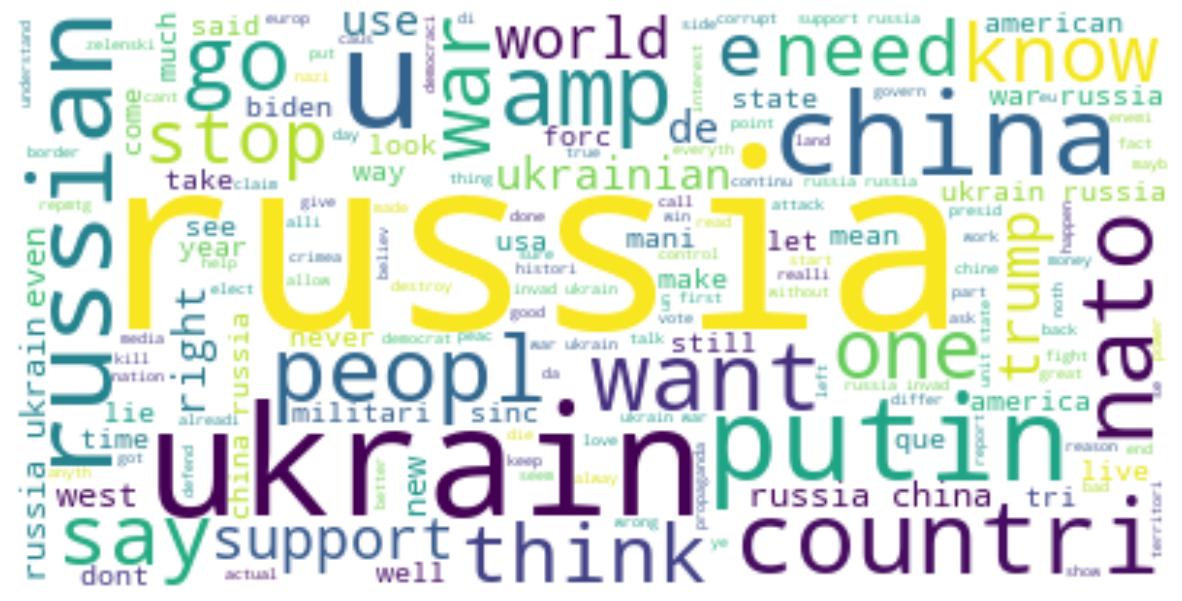

In [47]:
text = " ".join(i for i in df2.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color = 'white').generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df2['positif'] = [sentiments.polarity_scores(i)['pos'] for i in df2['tweet']]
df2['neutre'] = [sentiments.polarity_scores(i)['neu'] for i in df2['tweet']]
df2['negatif'] = [sentiments.polarity_scores(i)['neg'] for i in df2['tweet']]
print(df2.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\maxpe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\maxpe\AppData\Local\Temp\ipykernel_37656\3675519807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['positif'] = [sentiments.polarity_scores(i)['pos'] for i in df2['tweet']]
C:\Users\maxpe\AppData\Local\Temp\ipykernel_37656\3675519807.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['neutre'] = [sentiments.polarity_sco

         date     username                                              tweet  \
0  2023-02-28  tomasliptai      nazijaeg derwen  russia place satan rule well   
1  2023-02-28  paperfloure  russia haarp could destroy usa one fell swoop ...   
2  2023-02-28    katetbar1       putin give steven seagal  order friendship     
3  2023-02-28    jlhrdhmom       mainelif baddcompani it alway project russia   
4  2023-02-28    phemikali  pottingpink mfarussia modrussia milhistrf muze...   

  language  replies_count  retweets_count  likes_count  positif  neutre  \
0       en              0               0            0    0.259   0.741   
1       en              0               0            0    0.000   0.720   
2       en              0               0            0    0.367   0.633   
3       en              0               0            0    0.000   1.000   
4       en              0               0            0    0.068   0.854   

   negatif  
0    0.000  
1    0.280  
2    0.000  
3    0.000

C:\Users\maxpe\AppData\Local\Temp\ipykernel_37656\3675519807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['negatif'] = [sentiments.polarity_scores(i)['neg'] for i in df2['tweet']]


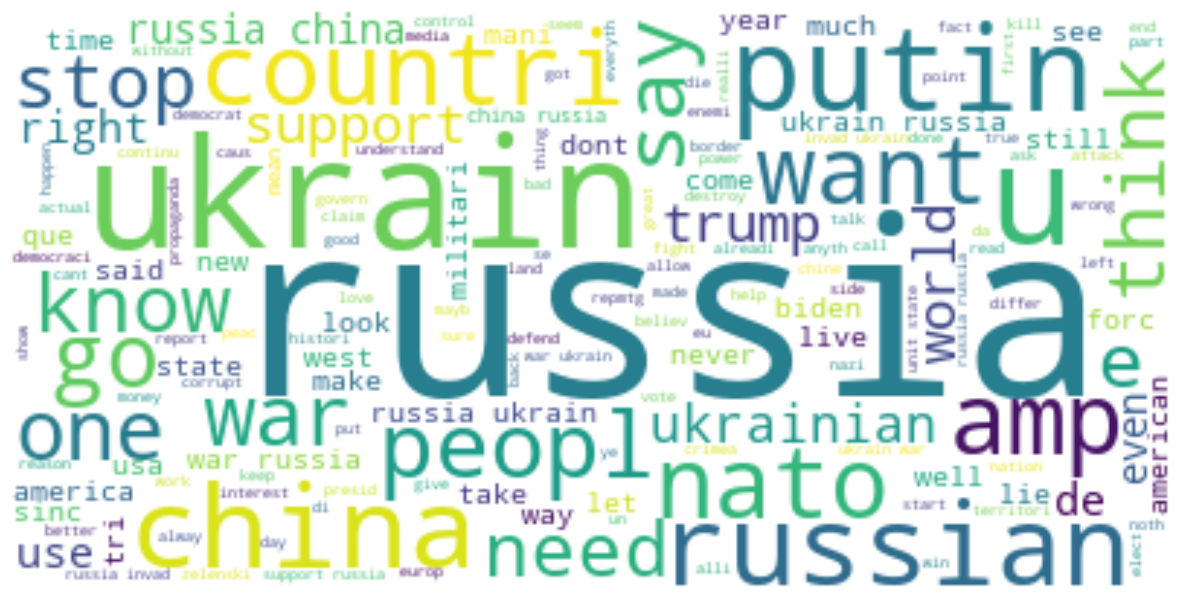

In [49]:
positif = " ".join([i for i in df2['tweet'][df2['positif'] > df2['negatif']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color = 'white').generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

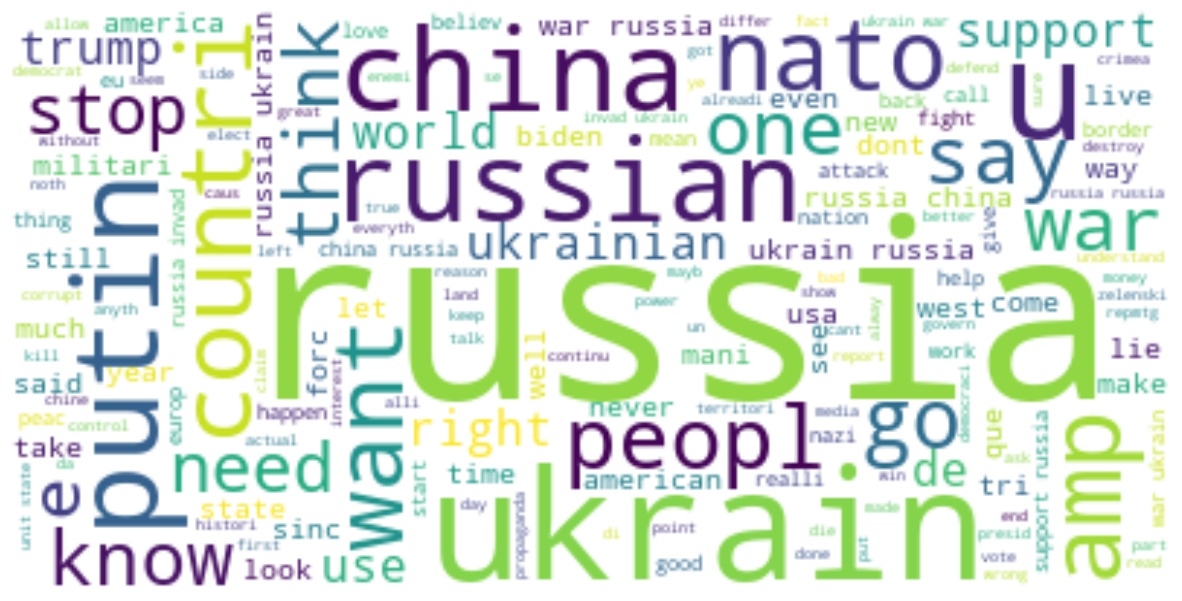

In [50]:
negatif = " ".join([i for i in df2['tweet'][df2['negatif'] > df2['positif']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color = 'white').generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [51]:
from nltk.stem.snowball import SnowballStemmer
from heapq import nlargest

text_negatif = (df2['tweet'][df2['negatif'] > df2['positif']])

# Preprocess text (lowercase, remove punctuation, tokenize)
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    stemmer = SnowballStemmer('english')

    words = [word.lower() for word in text.split() if word not in stop_words]
    words = [stemmer.stem(word) for word in words]

    return words

processed_text = [preprocess_text(text) for text in text_negatif]

# Count word frequencies
word_counts = {}
for words in processed_text:
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

# Find most frequent words
most_frequent_negative_words = nlargest(10, word_counts.items(), key=lambda item: item[1])  # Adjust '10' for desired number of words
print(most_frequent_negative_words)

[('russia', 4607), ('ukrain', 1778), ('war', 1487), ('china', 750), ('us', 748), ('russian', 524), ('nato', 486), ('putin', 478), ('countri', 440), ('peopl', 373)]


In [52]:
text_positif = (df2['tweet'][df2['positif'] > df2['negatif']])

# Preprocess text (lowercase, remove punctuation, tokenize)
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    stemmer = SnowballStemmer('english')

    words = [word.lower() for word in text.split() if word not in stop_words]
    words = [stemmer.stem(word) for word in words]

    return words

processed_text = [preprocess_text(text) for text in text_positif]

# Count word frequencies
word_counts = {}
for words in processed_text:
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

# Find most frequent words
most_frequent_positive_words = nlargest(10, word_counts.items(), key=lambda item: item[1])  # Adjust '10' for desired number of words
print(most_frequent_positive_words)

[('russia', 3371), ('ukrain', 1022), ('like', 567), ('china', 555), ('us', 479), ('support', 450), ('want', 412), ('putin', 362), ('russian', 359), ('would', 342)]


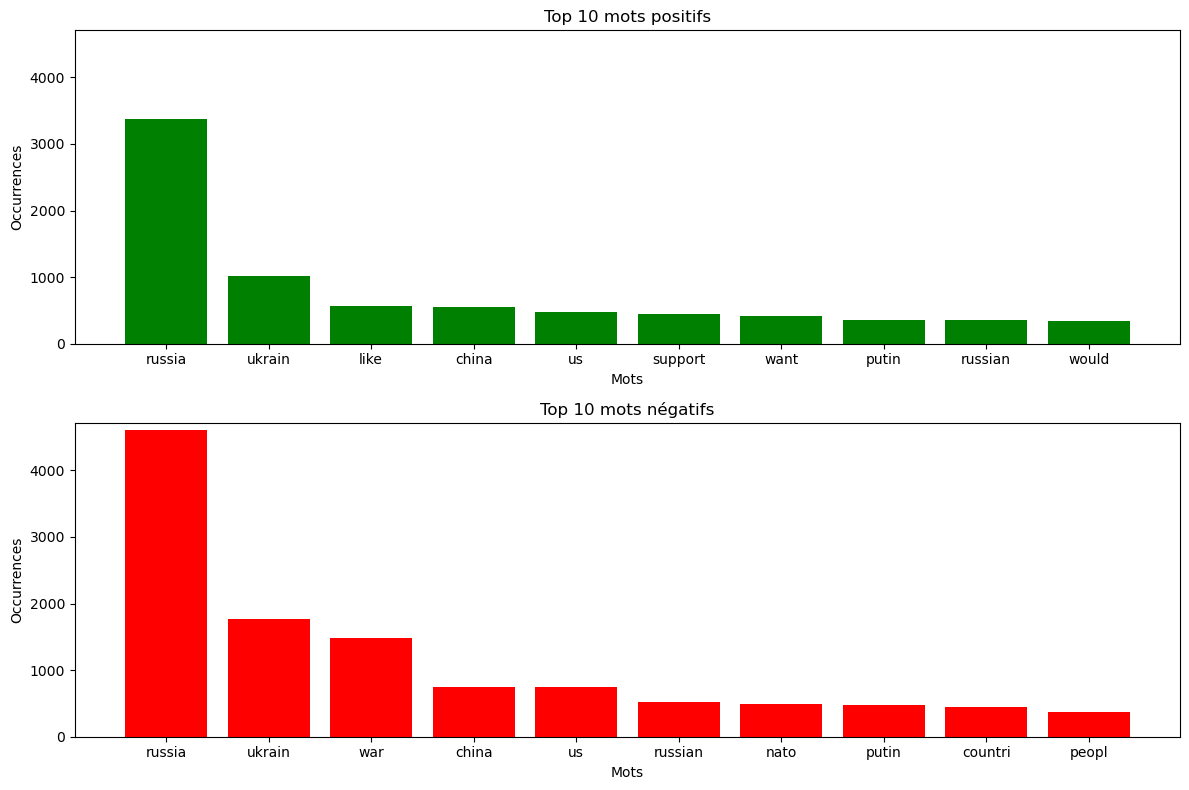

In [53]:
from collections import Counter

# Étape 3: Compter les occurrences des mots
def count_words(texts):
    words = " ".join(texts).lower().split()
    return Counter(words)

positive_words_count = count_words(text_positif)
negative_words_count = count_words(text_negatif)

most_frequent_positive_words = positive_words_count.most_common(10)
most_frequent_negative_words = negative_words_count.most_common(10)

# Convertir les résultats en DataFrame pour une manipulation facile
df_positive = pd.DataFrame(most_frequent_positive_words, columns=['word', 'count'])
df_negative = pd.DataFrame(most_frequent_negative_words, columns=['word', 'count'])

# Étape 5: Créer le graphique en barres
y_max = max(df_positive['count'].max(), df_negative['count'].max()) + 100
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Graphique pour les mots positifs
ax[0].bar(df_positive['word'], df_positive['count'], color='green')
ax[0].set_title('Top 10 mots positifs')
ax[0].set_xlabel('Mots')
ax[0].set_ylabel('Occurrences')
ax[0].set_ylim(0,y_max)

# Graphique pour les mots négatifs
ax[1].bar(df_negative['word'], df_negative['count'], color='red')
ax[1].set_title('Top 10 mots négatifs')
ax[1].set_xlabel('Mots')
ax[1].set_ylabel('Occurrences')
ax[1].set_ylim(0,y_max)

# Ajuster les espacements pour une meilleure présentation
plt.tight_layout()
plt.show()

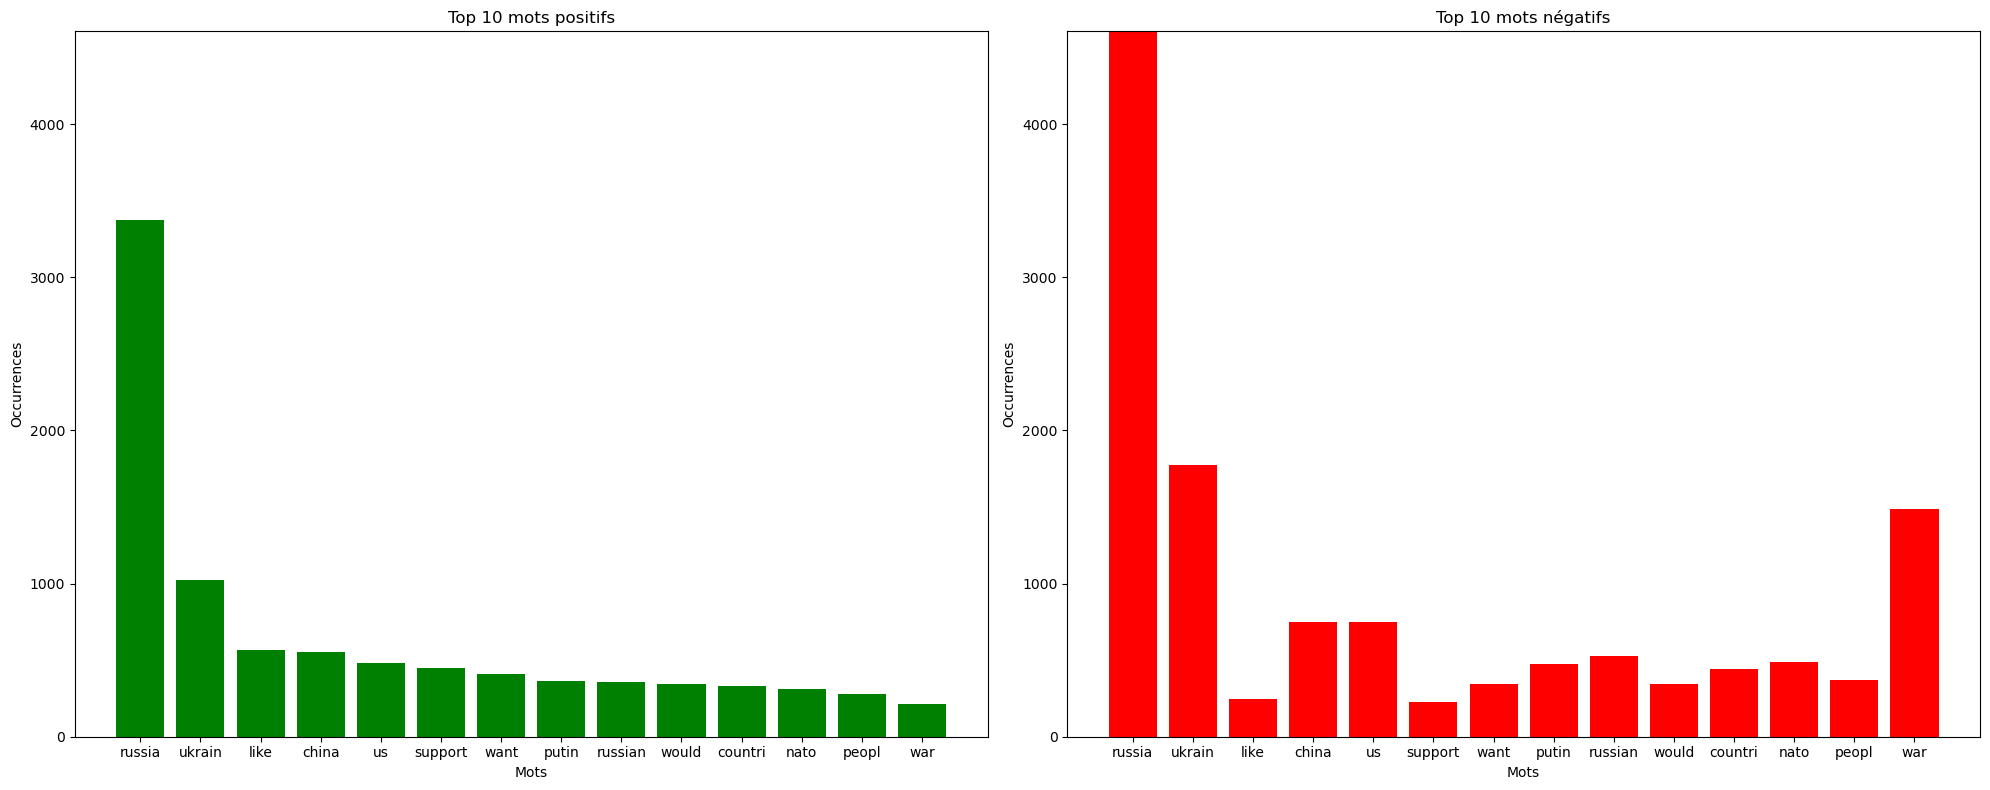

In [54]:
from collections import Counter

# Étape 3: Compter les occurrences des mots
def count_words(texts):
    words = " ".join(texts).lower().split()
    return Counter(words)

positive_words_count = count_words(text_positif)
negative_words_count = count_words(text_negatif)

# Étape 4: Sélectionner les 10 mots les plus fréquents pour chaque catégorie
most_frequent_positive_words = positive_words_count.most_common(10)
most_frequent_negative_words = negative_words_count.most_common(10)

# Convertir les résultats en DataFrame pour une manipulation facile
df_positive = pd.DataFrame(most_frequent_positive_words, columns=['word', 'count'])
df_negative = pd.DataFrame(most_frequent_negative_words, columns=['word', 'count'])

# Créer une liste combinée de mots
combined_words = list(set(df_positive['word']).union(set(df_negative['word'])))

# Créer des dictionnaires pour les occurrences des mots
positive_word_counts = dict(positive_words_count)
negative_word_counts = dict(negative_words_count)

# Aligner les occurrences des mots pour chaque catégorie
positive_counts_aligned = {word: positive_word_counts.get(word, 0) for word in combined_words}
negative_counts_aligned = {word: negative_word_counts.get(word, 0) for word in combined_words}

# Trier les mots combinés selon les occurrences dans df_positive
sorted_combined_words = sorted(combined_words, key=lambda word: positive_counts_aligned[word], reverse=True)

# Réarranger les occurrences des mots selon l'ordre trié
positive_counts_sorted = [positive_counts_aligned[word] for word in sorted_combined_words]
negative_counts_sorted = [negative_counts_aligned[word] for word in sorted_combined_words]

y_max = max(df_positive['count'].max(), df_negative['count'].max())

# Étape 5: Créer les graphiques en barres
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Graphique pour les mots positifs
ax[0].bar(sorted_combined_words, positive_counts_sorted, color='green')
ax[0].set_title('Top 10 mots positifs')
ax[0].set_xlabel('Mots')
ax[0].set_ylabel('Occurrences')
ax[0].set_ylim(0, y_max)

# Graphique pour les mots négatifs
ax[1].bar(sorted_combined_words, negative_counts_sorted, color='red')
ax[1].set_title('Top 10 mots négatifs')
ax[1].set_xlabel('Mots')
ax[1].set_ylabel('Occurrences')
ax[1].set_ylim(0, y_max)

# Ajuster les espacements pour une meilleure présentation
plt.tight_layout()
plt.show()

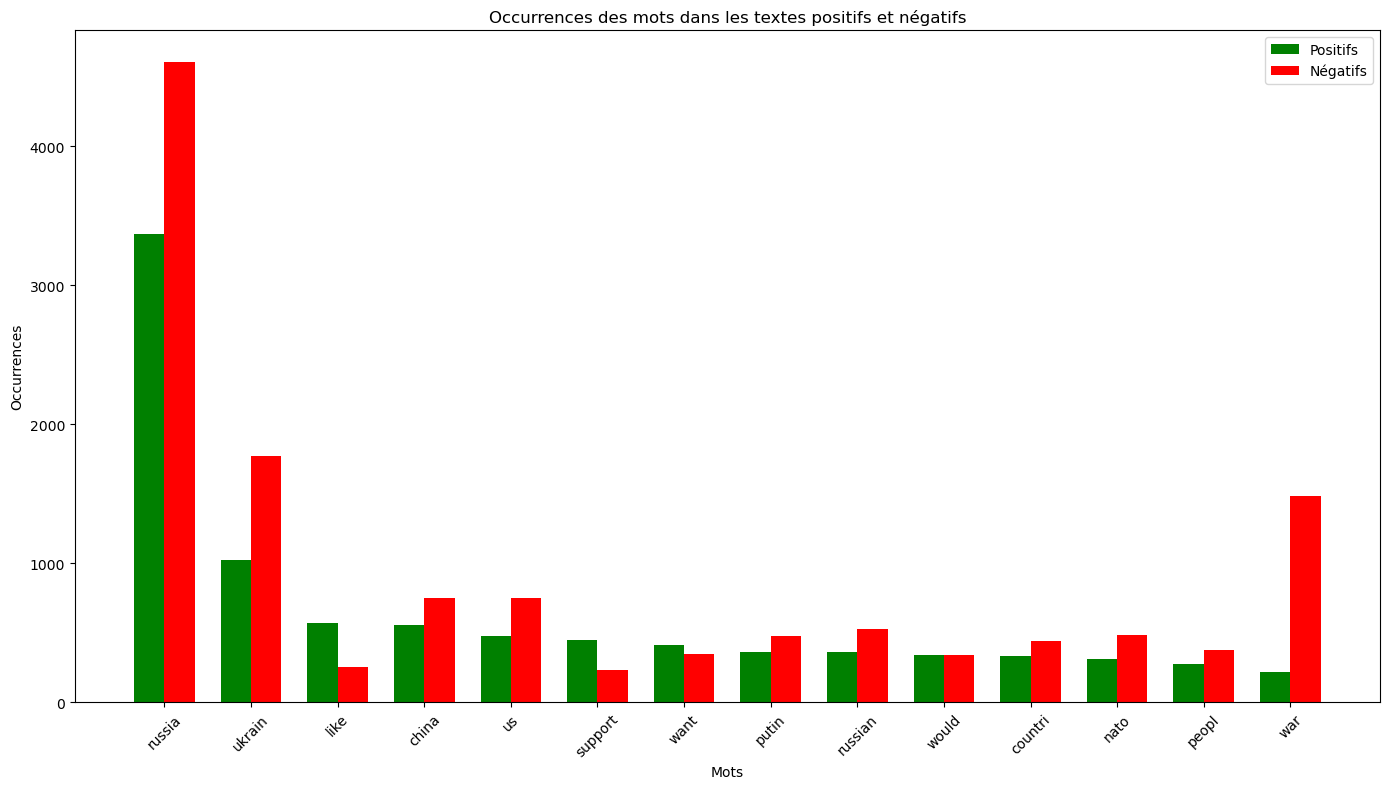

In [55]:
# Étape 3: Compter les occurrences des mots
def count_words(texts):
    words = " ".join(texts).lower().split()
    return Counter(words)

positive_words_count = count_words(text_positif)
negative_words_count = count_words(text_negatif)

# Étape 4: Sélectionner les 10 mots les plus fréquents pour chaque catégorie
most_frequent_positive_words = positive_words_count.most_common(10)
most_frequent_negative_words = negative_words_count.most_common(10)

# Convertir les résultats en DataFrame pour une manipulation facile
df_positive = pd.DataFrame(most_frequent_positive_words, columns=['word', 'count'])
df_negative = pd.DataFrame(most_frequent_negative_words, columns=['word', 'count'])

# Créer une liste combinée de mots
combined_words = list(set(df_positive['word']).union(set(df_negative['word'])))

# Créer des dictionnaires pour les occurrences des mots
positive_word_counts = dict(positive_words_count)
negative_word_counts = dict(negative_words_count)

# Aligner les occurrences des mots pour chaque catégorie
positive_counts_aligned = {word: positive_word_counts.get(word, 0) for word in combined_words}
negative_counts_aligned = {word: negative_word_counts.get(word, 0) for word in combined_words}

# Trier les mots combinés selon les occurrences dans df_positive
sorted_combined_words = sorted(combined_words, key=lambda word: positive_counts_aligned[word], reverse=True)

# Réarranger les occurrences des mots selon l'ordre trié
positive_counts_sorted = [positive_counts_aligned[word] for word in sorted_combined_words]
negative_counts_sorted = [negative_counts_aligned[word] for word in sorted_combined_words]

# Étape 5: Créer le graphique en barres
x = np.arange(len(sorted_combined_words))  # la position des mots
width = 0.35  # la largeur des barres

fig, ax = plt.subplots(figsize=(14, 8))

# Barres pour les mots positifs
bars1 = ax.bar(x - width/2, positive_counts_sorted, width, label='Positifs', color='green')

# Barres pour les mots négatifs
bars2 = ax.bar(x + width/2, negative_counts_sorted, width, label='Négatifs', color='red')

# Ajouter des étiquettes, des titres et une légende
ax.set_xlabel('Mots')
ax.set_ylabel('Occurrences')
ax.set_title('Occurrences des mots dans les textes positifs et négatifs')
ax.set_xticks(x)
ax.set_xticklabels(sorted_combined_words)
ax.legend()

# Afficher le graphique
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [56]:
most_frequent_positive_words = positive_words_count.most_common(1000000)
most_frequent_negative_words = negative_words_count.most_common(1000000)

# Convertir les résultats en DataFrame pour une manipulation facile
df_positive = pd.DataFrame(most_frequent_positive_words, columns=['word', 'count'])
df_negative = pd.DataFrame(most_frequent_negative_words, columns=['word', 'count'])

print(df_positive.shape)
print(df_negative.shape)

(10729, 2)
(11841, 2)


In [57]:
# Exemple: data_subset['text_length'] = data_subset['video_transcription_text'].str.len()
df2['word_counts'] = df2['tweet'].str.split().str.len()
positive_words_per_tweet = (df2[df2['positif'] > df2['negatif']]['word_counts'])
negative_words_per_tweet = (df2[df2['negatif'] > df2['positif']]['word_counts'])

positive_words_per_tweet_median = positive_words_per_tweet.median()
negative_words_per_tweet_median = negative_words_per_tweet.median()

positive_words_per_tweet_moy = positive_words_per_tweet.mean()
negative_words_per_tweet_moy = negative_words_per_tweet.mean()

print("median des tweets positifs: ", positive_words_per_tweet_median)
print("median des tweets négatifs: ", negative_words_per_tweet_median)

median des tweets positifs:  19.0
median des tweets négatifs:  19.0


C:\Users\maxpe\AppData\Local\Temp\ipykernel_37656\2721512874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['word_counts'] = df2['tweet'].str.split().str.len()


In [58]:
most_like_tweet = df1[df1['likes_count']>=1500]['tweet']
most_retweet_tweet = df1[df1['retweets_count']>=400]['tweet']
most_comment_tweet = df1[df1['replies_count']>=100]['tweet']
print(most_like_tweet)
print()
print(most_retweet_tweet)
print()
print(most_comment_tweet)

9488    Russian oppositioner Boris Nemtsov, killed 8 y...
Name: tweet, dtype: object

9488    Russian oppositioner Boris Nemtsov, killed 8 y...
Name: tweet, dtype: object

7262    Why is it that "american patriots" nowadays al...
Name: tweet, dtype: object


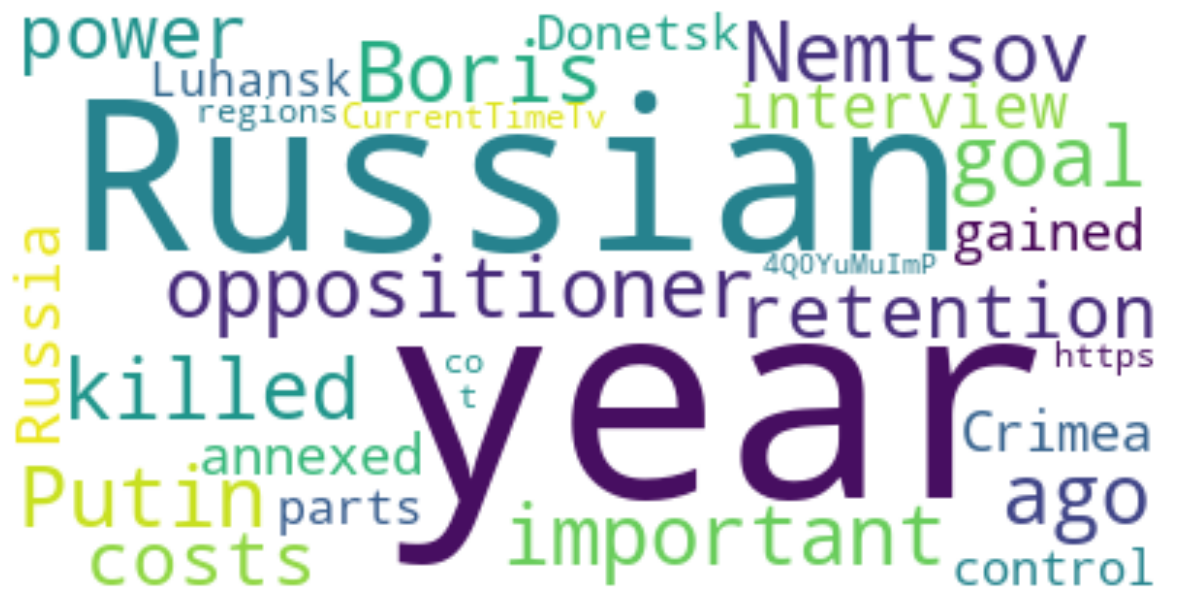

In [59]:
text = " ".join(i for i in df1[df1['likes_count']>=1500]['tweet'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color = 'white').generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

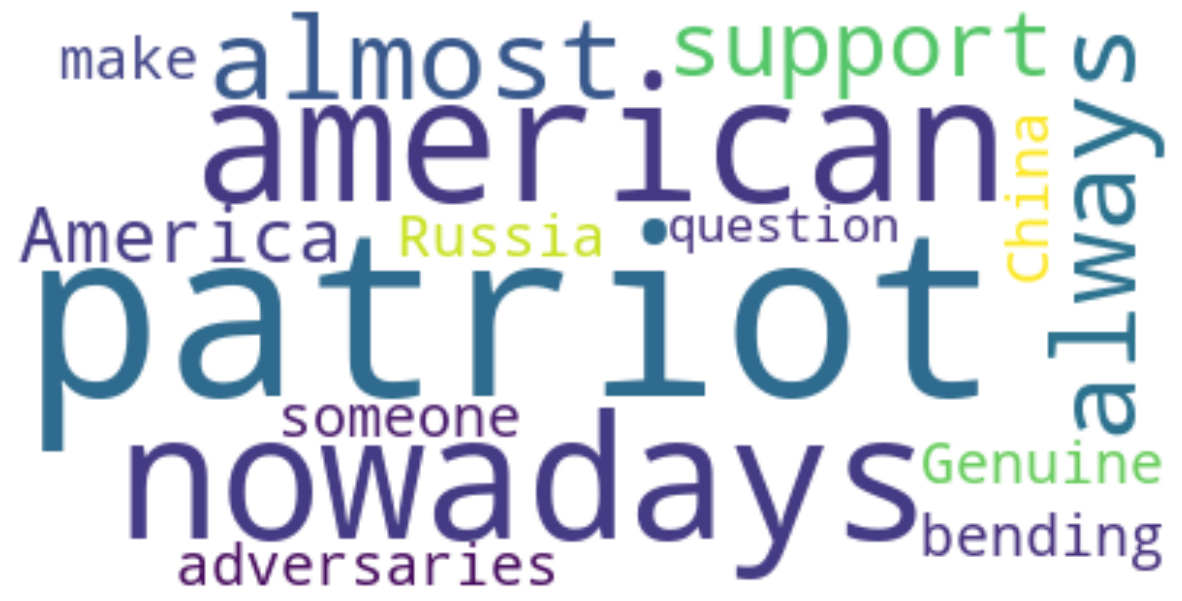

In [60]:
text = " ".join(i for i in df1[df1['replies_count']>=200]['tweet'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color = 'white').generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

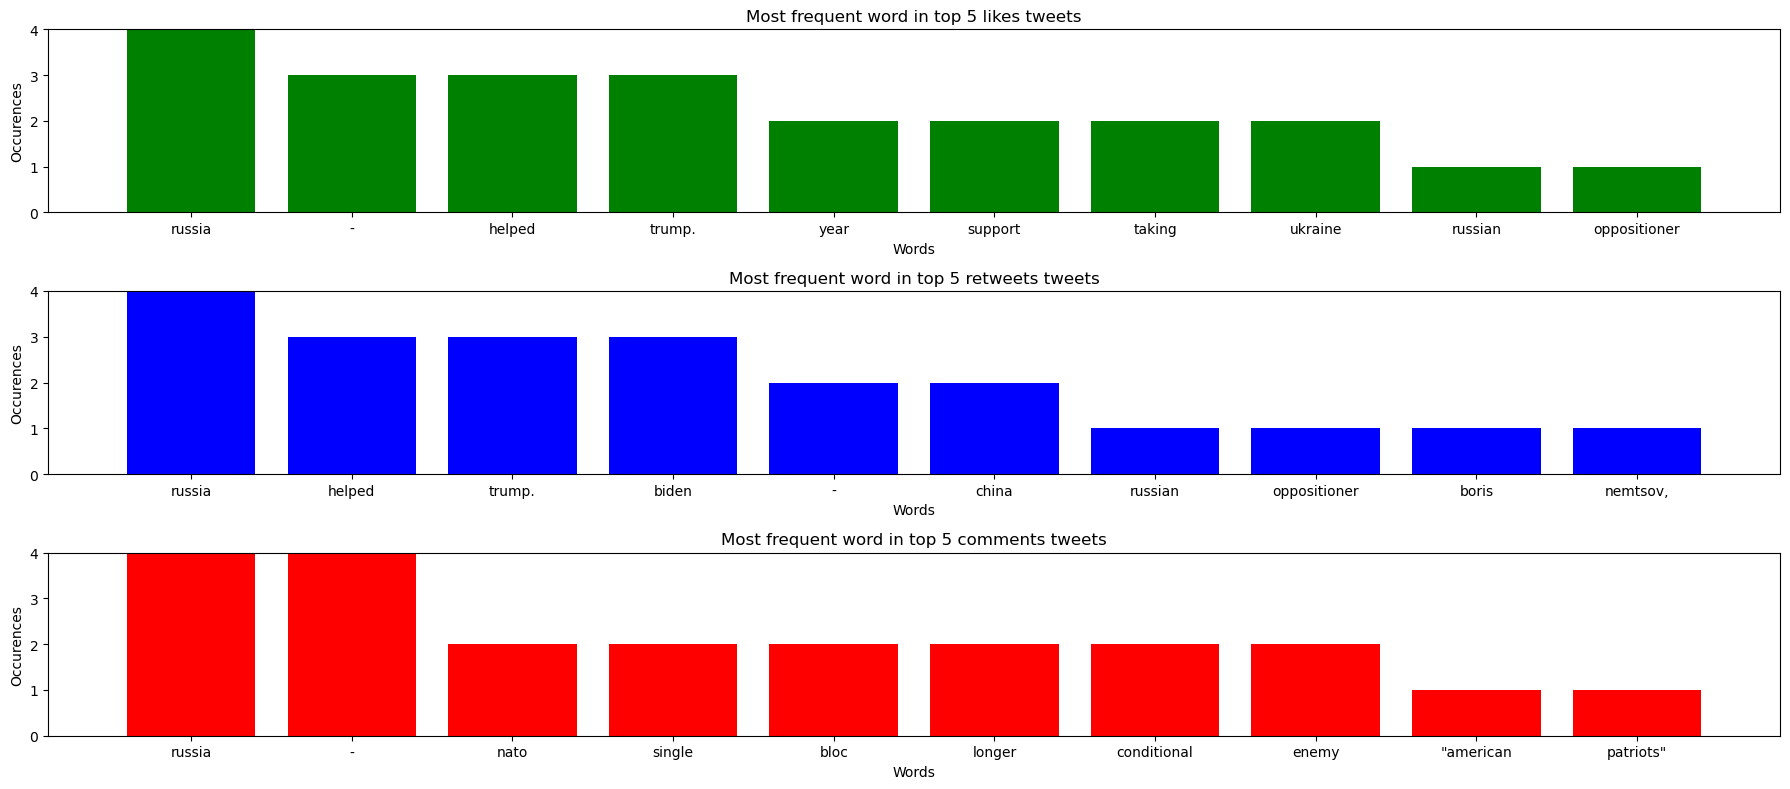

In [62]:
stopwords = set(STOPWORDS)

def count_words(texts, stop_words):
    words = " ".join(texts).lower().split()
    filtered_words = [word for word in words if word not in stop_words]
    return Counter(filtered_words)

top_5_like_texts = df1.nlargest(5, 'likes_count')['tweet']
top_5_retweet_texts = df1.nlargest(5, 'retweets_count')['tweet']
top_5_comment_texts = df1.nlargest(5, 'replies_count')['tweet']

# Compter les mots dans les textes sélectionnés
top_5_like_words_count = count_words(top_5_like_texts, stopwords)
top_5_retweet_words_count = count_words(top_5_retweet_texts, stopwords)
top_5_comment_words_count = count_words(top_5_comment_texts, stopwords)

# Étape 4: Sélectionner les 10 mots les plus fréquents pour chaque catégorie
most_frequent_likes_words = top_5_like_words_count.most_common(10)
most_frequent_retweets_words = top_5_retweet_words_count.most_common(10)
most_frequent_comments_words = top_5_comment_words_count.most_common(10)

# Convertir les résultats en DataFrame pour une manipulation facile
df_like = pd.DataFrame(most_frequent_likes_words, columns=['word', 'count'])
df_retweet = pd.DataFrame(most_frequent_retweets_words, columns=['word', 'count'])
df_comment = pd.DataFrame(most_frequent_comments_words, columns=['word', 'count'])

y_max = max(df_like['count'].max(),df_retweet['count'].max(),df_comment['count'].max())

fig, ax = plt.subplots(3, 1, figsize = (18,8))

ax[0].bar(df_like['word'],df_like['count'],color='green')
ax[0].set_title('Most frequent word in top 5 likes tweets')
ax[0].set_xlabel('Words')
ax[0].set_ylabel('Occurences')
ax[0].set_ylim(0, y_max)

ax[1].bar(df_retweet['word'],df_retweet['count'],color='blue')
ax[1].set_title('Most frequent word in top 5 retweets tweets')
ax[1].set_xlabel('Words')
ax[1].set_ylabel('Occurences')
ax[1].set_ylim(0, y_max)

ax[2].bar(df_comment['word'],df_comment['count'],color='red')
ax[2].set_title('Most frequent word in top 5 comments tweets')
ax[2].set_xlabel('Words')
ax[2].set_ylabel('Occurences')
ax[2].set_ylim(0, y_max)

# Ajuster les espacements pour une meilleure présentation
plt.tight_layout()
plt.show()

In [63]:
sia = SentimentIntensityAnalyzer()

# Calculer les scores de sentiment pour chaque tweet
df1['positif'] = [sia.polarity_scores(i)['pos'] for i in df1['tweet']]
df1['neutre'] = [sia.polarity_scores(i)['neu'] for i in df1['tweet']]
df1['negatif'] = [sia.polarity_scores(i)['neg'] for i in df1['tweet']]

# Sélectionner les 5 textes les plus vus pour chaque catégorie avec les scores de sentiment associés
top_5_like_texts_sentiment = df1.nlargest(5, 'likes_count')[['tweet', 'likes_count', 'positif', 'neutre', 'negatif']].sort_values(by='likes_count', ascending=False)
top_5_retweet_texts_sentiment = df1.nlargest(5, 'retweets_count')[['tweet', 'retweets_count', 'positif', 'neutre', 'negatif']].sort_values(by='retweets_count', ascending=False)
top_5_comment_texts_sentiment = df1.nlargest(5, 'replies_count')[['tweet', 'replies_count', 'positif', 'neutre', 'negatif']].sort_values(by='replies_count', ascending=False)

# Afficher les résultats
print("Top 5 textes les plus likés avec sentiments:")
print(top_5_like_texts_sentiment)
print()
print("Top 5 textes les plus retweetés avec sentiments:")
print(top_5_retweet_texts_sentiment)
print()
print("Top 5 textes les plus commentés avec sentiments:")
print(top_5_comment_texts_sentiment)


Top 5 textes les plus likés avec sentiments:
                                                  tweet  likes_count  positif  \
9488  Russian oppositioner Boris Nemtsov, killed 8 y...         1524    0.102   
7262  Why is it that "american patriots" nowadays al...         1407    0.174   
8072  @MeidasTouch @MuellerSheWrote Russia helped tr...          927    0.121   
7325  Crowds taking to the streets of Sofia, Bulgari...          904    0.119   
7947  SitRep - 27/02/23 - 1 year ago, they failed ta...          853    0.000   

      neutre  negatif  
9488   0.801    0.097  
7262   0.760    0.066  
8072   0.779    0.100  
7325   0.881    0.000  
7947   0.791    0.209  

Top 5 textes les plus retweetés avec sentiments:
                                                  tweet  retweets_count  \
9488  Russian oppositioner Boris Nemtsov, killed 8 y...             579   
8072  @MeidasTouch @MuellerSheWrote Russia helped tr...             229   
9311  .@jsolomonReports says it all began when Jo

In [64]:
pd.set_option('display.max_colwidth', None)
print("Top 5 textes les plus likés avec sentiments:")
print(top_5_like_texts_sentiment)
print()
print("Top 5 textes les plus retweetés avec sentiments:")
print(top_5_retweet_texts_sentiment)
print()
print("Top 5 textes les plus commentés avec sentiments:")
print(top_5_comment_texts_sentiment)

Top 5 textes les plus likés avec sentiments:
                                                                                                                                                                                                                                                                                                        tweet  \
9488         Russian oppositioner Boris Nemtsov, killed 8 years ago: "[Putin's] most important goal: retention of power at all costs".  This interview is from 2014 - the year Russia annexed Crimea and gained control over parts of Donetsk and Luhansk regions.  📹: CurrentTimeTv  https://t.co/4Q0YuMuImP   
7262                                                                                                                       Why is it that "american patriots" nowadays almost always support America's adversaries? Like, how does bending over to Russia and China make someone a patriot? Genuine question.   
8072                                    

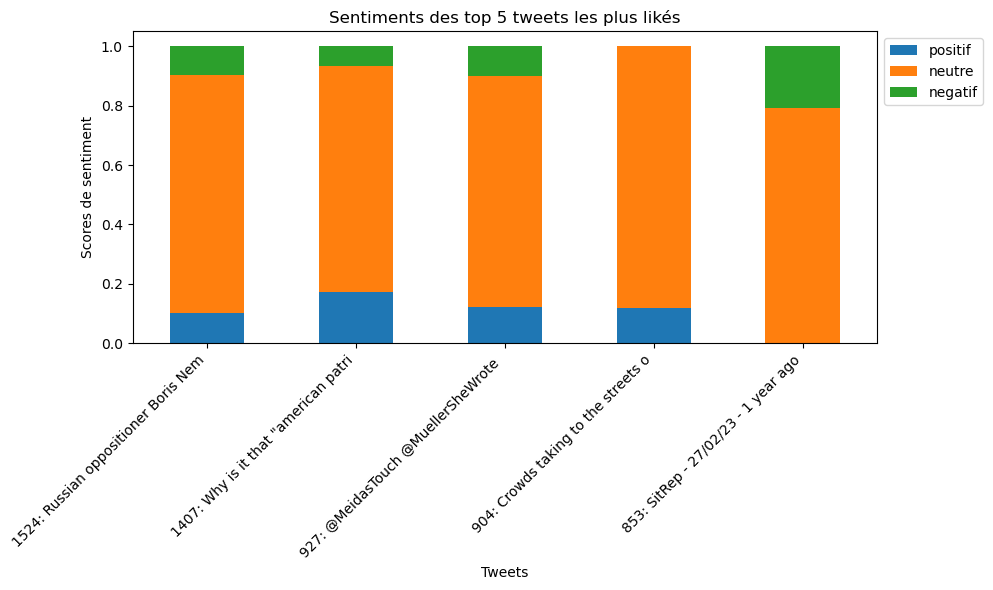

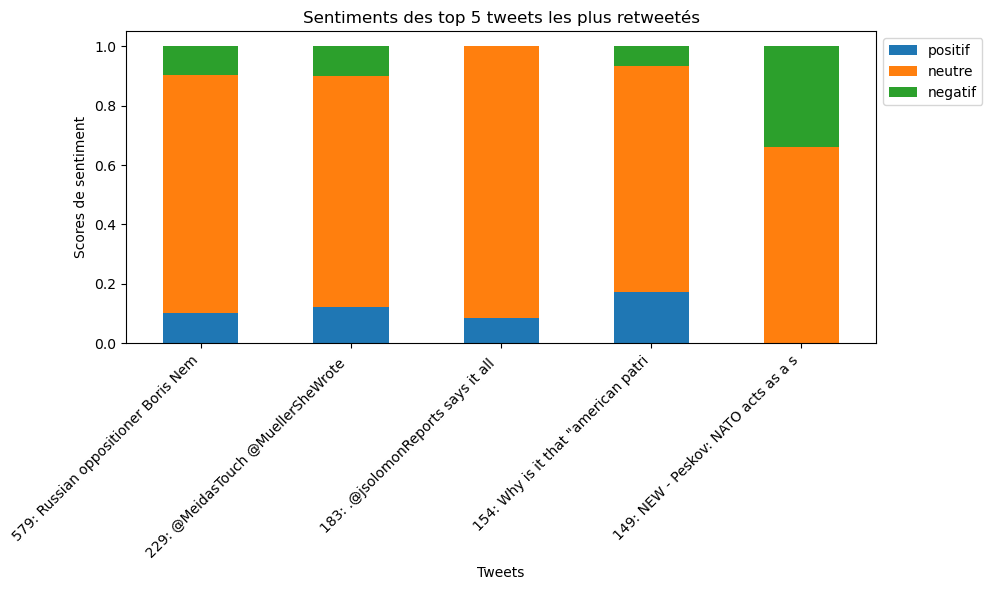

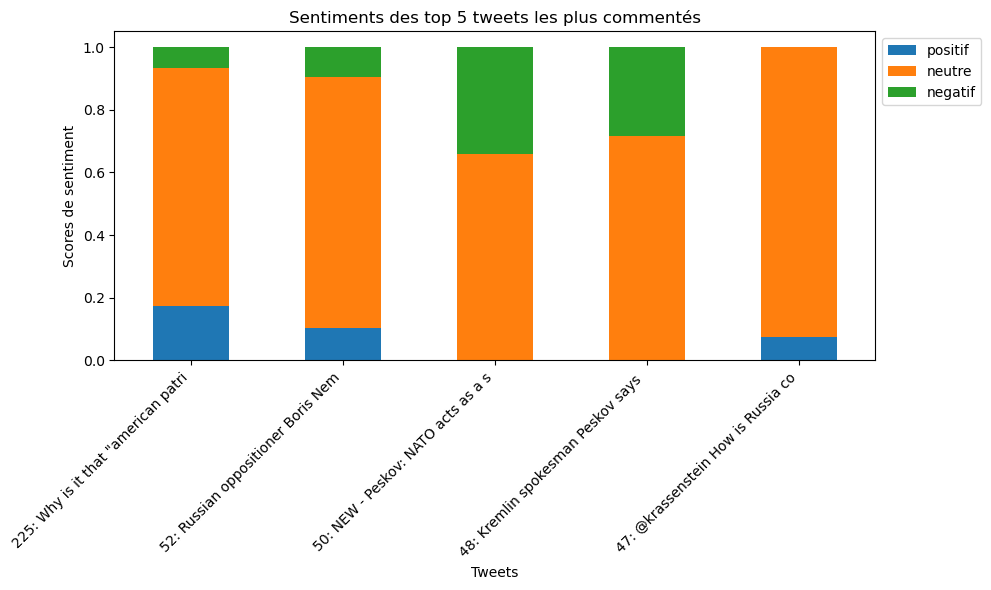

In [65]:
# Création des graphiques pour les scores de sentiment

def plot_sentiments(df, title, count_column):
    ax = df[['positif', 'neutre', 'negatif']].plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(title)
    plt.xlabel('Tweets')
    plt.ylabel('Scores de sentiment')
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_xticklabels(df[count_column].astype(str) + ': ' + df['tweet'].str[:30], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Graphique des sentiments pour les textes les plus likés
plot_sentiments(top_5_like_texts_sentiment, 'Sentiments des top 5 tweets les plus likés', 'likes_count')

# Graphique des sentiments pour les textes les plus retweetés
plot_sentiments(top_5_retweet_texts_sentiment, 'Sentiments des top 5 tweets les plus retweetés', 'retweets_count')

# Graphique des sentiments pour les textes les plus commentés
plot_sentiments(top_5_comment_texts_sentiment, 'Sentiments des top 5 tweets les plus commentés', 'replies_count')

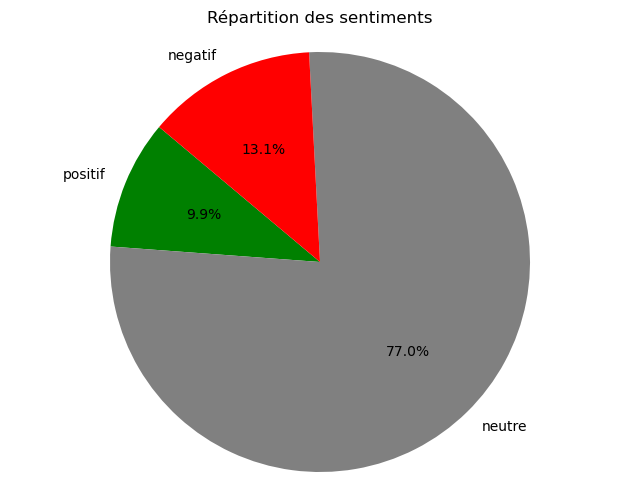

(10014, 11)


In [68]:
total_positif = df2['positif'].sum()
total_neutre = df2['neutre'].sum()
total_negatif=df2['negatif'].sum()

df_total = pd.DataFrame({'Sentiment':['positif','neutre','negatif'],'Score':[total_positif,total_neutre,total_negatif]})

# Visualiser la répartition des sentiments
def plot_sentiment_distribution(df):
    plt.figure(figsize=(8, 6))
    plt.pie(df['Score'], labels=df['Sentiment'], autopct='%1.1f%%', colors=['green', 'grey', 'red'], startangle=140)
    plt.title('Répartition des sentiments')
    plt.axis('equal')
    plt.show()

plot_sentiment_distribution(df_total)
print(df2.shape)